## Script para gráficos de predição em ordem de percentual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mygene
import h5py
import networkx as nx
import seaborn as sns
%matplotlib inline


In [10]:
rede = 'unity'

predict = pd.read_csv(f'C:/Users/renan/Desktop/predict/test_predictions_{rede}.csv')
predict

,gene,Predicted,Probability,True
0,RCN2,0.0,0.371315,0.0
1,GABBR2,0.0,0.307026,0.0
2,PLEKHO1,0.0,0.206258,0.0
3,MYO1F,0.0,0.386315,0.0
4,NEIL2,0.0,0.199618,0.0
...,...,...,...,...
1129,WIZ,0.0,0.361665,0.0
1130,SCAF11,0.0,0.423587,0.0
1131,EME1,0.0,0.408392,0.0
1132,MTAP,0.0,0.329007,1.0


In [19]:
predict = pd.read_csv(f'C:/Users/renan/Desktop/predict/concat/testset_predicoes.tsv', sep='\t')
predict



,gene,major_vot,mean_prob,label,mean_prob_bin
0,AAGAB,0.0,0.112055,0,0
1,ABCD2,0.0,0.179984,0,0
2,ABHD16A,0.0,0.051719,0,0
3,ABLIM3,0.0,0.198306,0,0
4,ABT1,0.0,0.119567,0,0
...,...,...,...,...,...
1129,ZNF670,0.0,0.110188,0,0
1130,ZSCAN21,0.0,0.142837,0,0
1131,ZSWIM2,0.0,0.109822,0,0
1132,ZW10,0.0,0.262325,0,0


In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

print('Accuracy = %0.4f' % accuracy_score(predict['label'], predict['mean_prob_bin']))

print('AUC-ROC = %0.4f' % roc_auc_score(predict['label'], predict['mean_prob']))

precision, recall, thresholds = precision_recall_curve(predict['label'], predict['mean_prob'])
lab = 'AUC-PR = %0.4f' % (auc(recall, precision))

print(lab)

Accuracy = 0.9074
AUC-ROC = 0.8933
AUC-PR = 0.6768


In [183]:
# Testes mudando do threshold para as probabilidades de predição e gerando novas matrizes de confusão (0.2 // 0.3 // 0.4)

predict['prob_bin'] = (predict['Probability'] >= .4).astype(int)
predict

,gene,Predicted,Probability,True,prob_bin
0,RCN2,0.0,0.371315,0.0,0
1,GABBR2,0.0,0.307026,0.0,0
2,PLEKHO1,0.0,0.206258,0.0,0
3,MYO1F,0.0,0.386315,0.0,0
4,NEIL2,0.0,0.199618,0.0,0
...,...,...,...,...,...
1129,WIZ,0.0,0.361665,0.0,0
1130,SCAF11,0.0,0.423587,0.0,1
1131,EME1,0.0,0.408392,0.0,1
1132,MTAP,0.0,0.329007,1.0,0


In [184]:
predict['prob_bin'].value_counts()

0    800
1    334
Name: prob_bin, dtype: int64

In [185]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, thresholds = precision_recall_curve(predict['True'], predict['prob_bin'])
lab = 'AUC-PR = %0.4f' % (auc(recall, precision))

print(lab)

AUC-PR = 0.5826


In [9]:
SMALL_SIZE = 22 #22 para individual 
MEDIUM_SIZE = 24 #24 para figura individual #26 para pagina completa
BIGGER_SIZE = 24 #24 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('ytick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

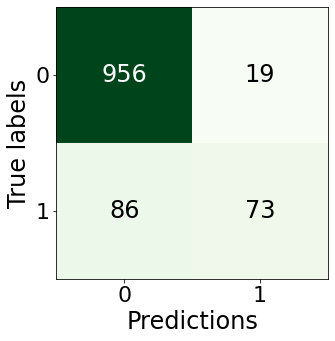

In [10]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=predict['label'], y_pred=predict['mean_prob_bin'])
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions')
plt.ylabel('True labels')

file_name = f"C:/Users/renan/Desktop/predict_novo/matrizes/test_matrix_average.pdf"
plt.savefig(file_name, format="pdf", bbox_inches="tight")

plt.show()

In [188]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\renan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


-------

In [ ]:
ordenado = predict.sort_values('Probability')
ordenado


,gene,Predicted,Probability,True
963,HTN1,0.0,0.024198,0.0
952,IGSF21,0.0,0.035658,0.0
806,WFDC2,0.0,0.039945,0.0
308,ATP5MK,0.0,0.051631,0.0
530,FAM193B,0.0,0.055431,0.0
...,...,...,...,...
434,CASP8,1.0,0.731809,1.0
762,NCOR1,1.0,0.733113,1.0
289,MAPK3,1.0,0.733447,1.0
364,SRC,1.0,0.747488,1.0


In [ ]:
sort = ordenado.reset_index(drop=True)

In [ ]:
SMALL_SIZE = 22 #22 para individual 
MEDIUM_SIZE = 24 #24 para figura individual #26 para pagina completa
BIGGER_SIZE = 24 #24 para figura individual #26 para pagina completa

plt.rc('font', size=BIGGER_SIZE)          
plt.rc('axes', titlesize=MEDIUM_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('ytick', labelsize=SMALL_SIZE)    # MEDIUM_SIZE para pagina completa # SMALL_SIZE individual
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

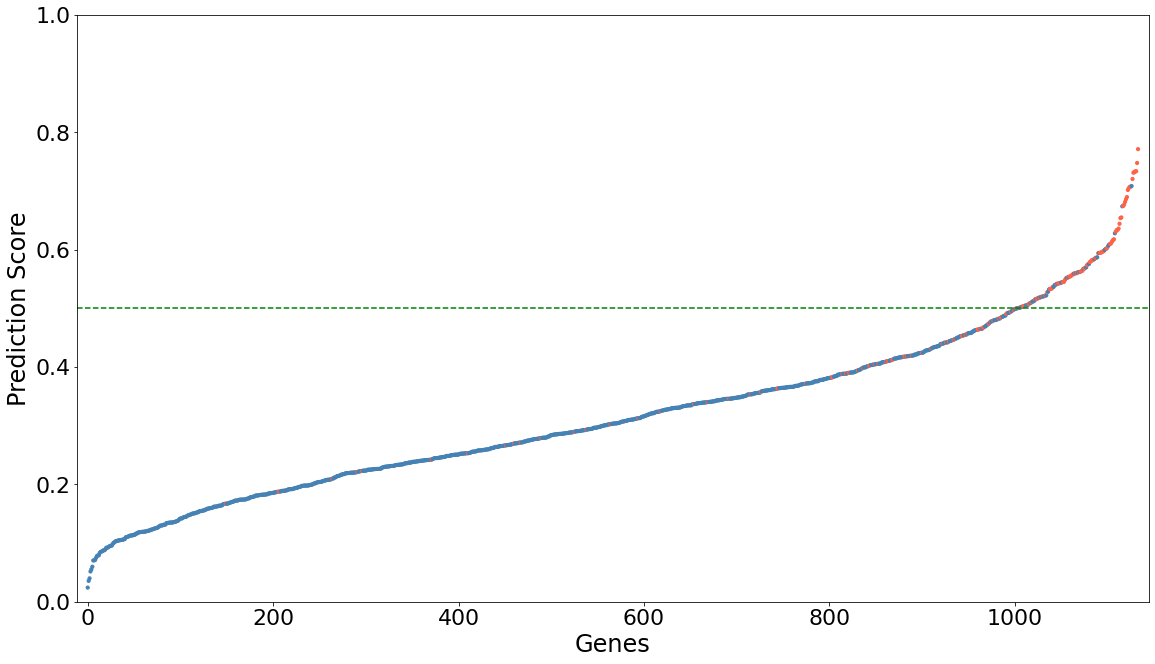

In [ ]:
plt.figure(figsize=(19.20,10.80))
#plt.title(label="STRING", fontsize=28)

plt.ylim([0, 1])
plt.margins(x=0.01)
plt.axhline(y=0.5, color='green', linestyle='--')

color= ['steelblue' if l == 0 else 'tomato' if l == 1 else 'silver' for l in sort['True']]
plt.scatter(sort.index, sort['Probability'], s=10, c=color)

plt.xlabel("Genes")
plt.ylabel("Prediction Score")

#file_name = f"C:/Users/renan/Desktop/predict_novo/test_predict_{rede}.pdf"
#plt.savefig(file_name, format="pdf", bbox_inches="tight")

plt.show()